In [47]:
import gdal 
from os import sep, listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np 
from scipy import ndimage
gdal.UseExceptions()



In [54]:
DATASET_PATH = 'ECODSEdataset' + sep + 'ECODSEdataset'+ sep + 'RSdata'+ sep 
RGB_FOLDER_PATH = DATASET_PATH + 'camera' + sep
rgb_files = sorted([rgb_file for rgb_file in 
             [f for f in listdir(RGB_FOLDER_PATH) if isfile(join(RGB_FOLDER_PATH, f))] 
             if 'tif' in rgb_file and 'aux.xml' not in rgb_file])
# rgb_files
LIDAR_FOLDER_PATH = DATASET_PATH + 'chm' + sep
lidar_files = sorted([lidar_file for lidar_file in 
             [f for f in listdir(LIDAR_FOLDER_PATH) if isfile(join(LIDAR_FOLDER_PATH, f))] 
             if 'tif' in lidar_file and 'aux.xml' not in lidar_file])
HYPER_FOLDER_PATH = DATASET_PATH + 'hs' + sep
hyper_files = sorted([hyper_file for hyper_file in 
             [f for f in listdir(HYPER_FOLDER_PATH) if isfile(join(HYPER_FOLDER_PATH, f))] 
             if 'tif' in hyper_file and 'aux.xml' not in hyper_file])
print (rgb_files, lidar_files, hyper_files)

['OSBS_002_camera.tif', 'OSBS_003_camera.tif', 'OSBS_004_camera.tif', 'OSBS_005_camera.tif', 'OSBS_008_camera.tif', 'OSBS_009_camera.tif', 'OSBS_010_camera.tif', 'OSBS_011_camera.tif', 'OSBS_014_camera.tif', 'OSBS_017_camera.tif', 'OSBS_018_camera.tif', 'OSBS_019_camera.tif', 'OSBS_020_camera.tif', 'OSBS_021_camera.tif', 'OSBS_025_camera.tif', 'OSBS_026_camera.tif', 'OSBS_027_camera.tif', 'OSBS_028_camera.tif', 'OSBS_029_camera.tif', 'OSBS_030_camera.tif', 'OSBS_031_camera.tif', 'OSBS_032_camera.tif', 'OSBS_033_camera.tif', 'OSBS_034_camera.tif', 'OSBS_035_camera.tif', 'OSBS_036_camera.tif', 'OSBS_037_camera.tif', 'OSBS_038_camera.tif', 'OSBS_039_camera.tif', 'OSBS_040_camera.tif', 'OSBS_041_camera.tif', 'OSBS_042_camera.tif', 'OSBS_043_camera.tif', 'OSBS_044_camera.tif', 'OSBS_048_camera.tif', 'OSBS_050_camera.tif', 'OSBS_051_camera.tif'] ['OSBS_001_chm.tif', 'OSBS_002_chm.tif', 'OSBS_003_chm.tif', 'OSBS_004_chm.tif', 'OSBS_005_chm.tif', 'OSBS_006_chm.tif', 'OSBS_007_chm.tif', 'OSBS_0

In [56]:
rgb_image = gdal.Open(RGB_FOLDER_PATH + rgb_files[5]).ReadAsArray().T
lidar_image = gdal.Open(LIDAR_FOLDER_PATH + lidar_files[5]).ReadAsArray().T
hyper_image = gdal.Open(HYPER_FOLDER_PATH + hyper_files[5]).ReadAsArray().T

In [57]:
print (rgb_image.shape, lidar_image.shape, hyper_image.shape)

(320, 320, 3) (80, 80) (80, 80, 426)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Invalid dimensions for image data

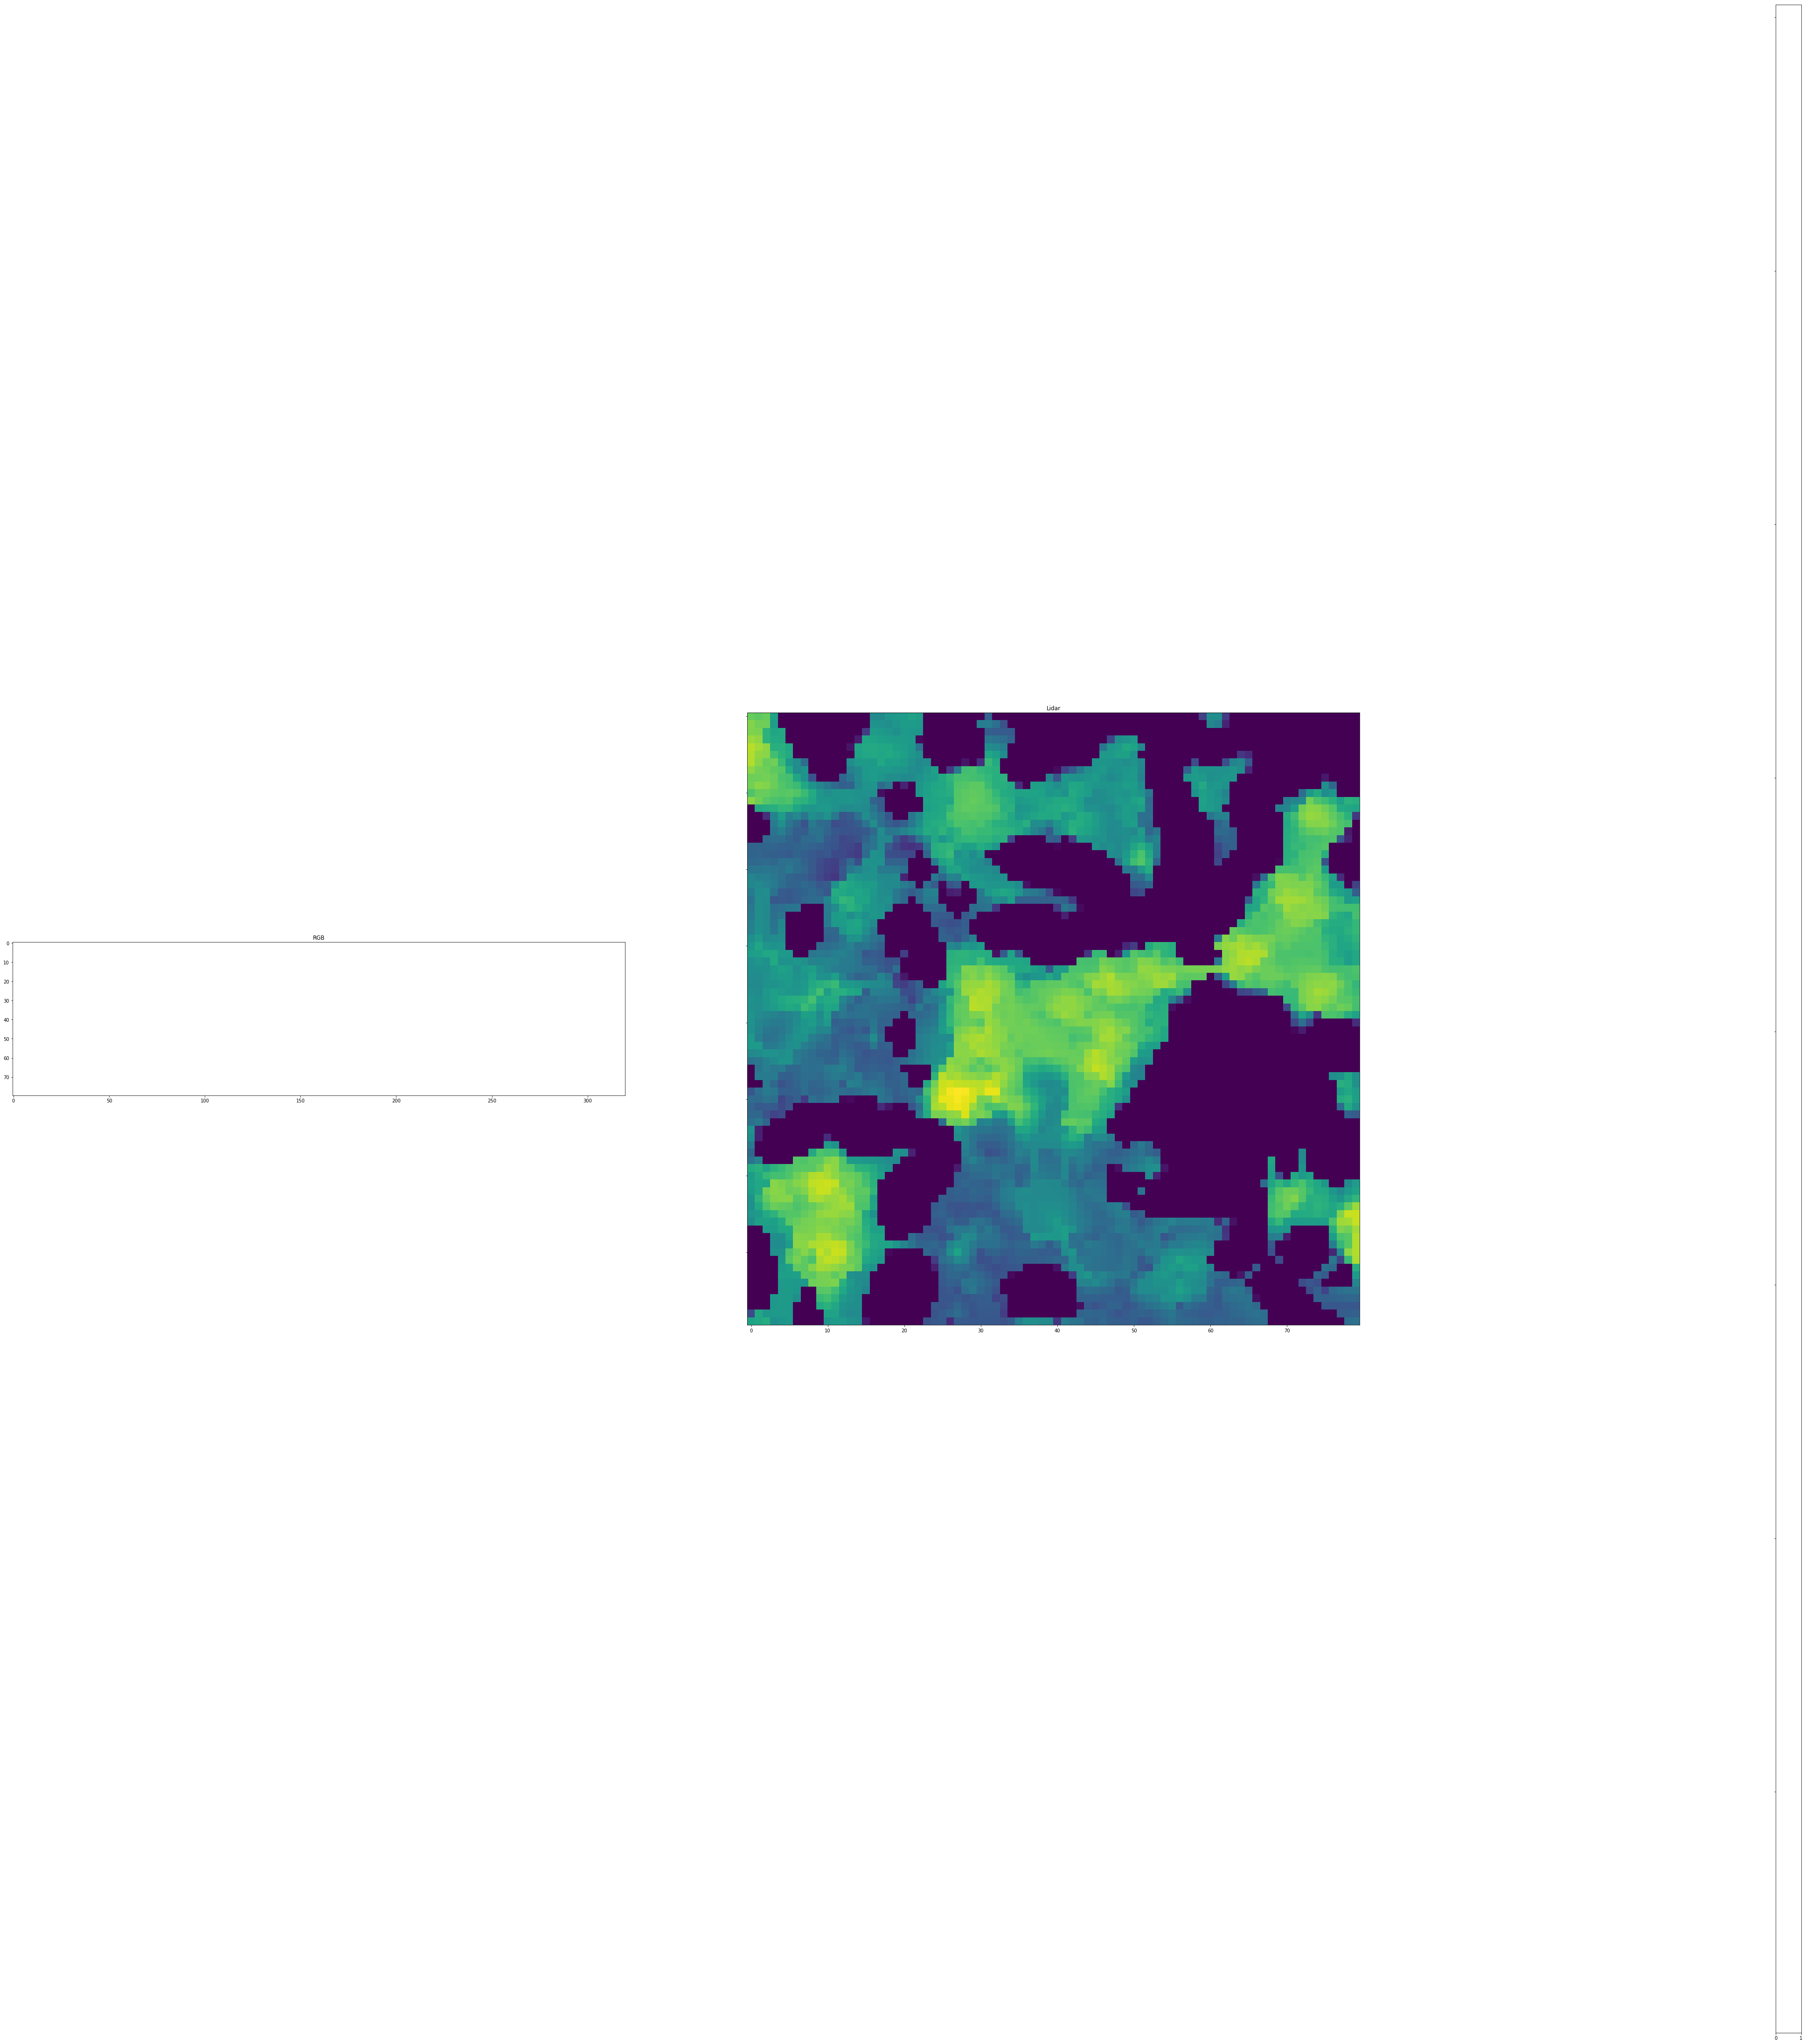

In [59]:
f, axes = plt.subplots(1, 3 , sharey=True,figsize=(80,80))
axes[0].imshow(rgb_image)
axes[0].set_title('RGB')
axes[1].imshow(lidar_image)
axes[1].set_title('Lidar')
axes[2].imshow(hyper_image)
axes[2].set_title('HyperSpectral')
f.tight_layout()
# plt.imshow(lidar_image/lidar_image.max(), origin='lower')

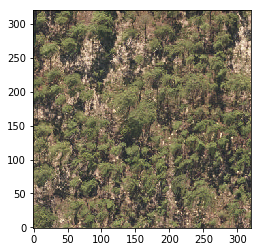

In [37]:
# RGB Image Bands Viewer 
plt.imshow((img_array.T/img_array.max()), origin='lower')


In [38]:
plt.imsave('out.png',img_array.T/img_array.max(), origin='lower')

In [44]:
from os import sep 

In [45]:
sep

'/'